In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 64s 0us/step


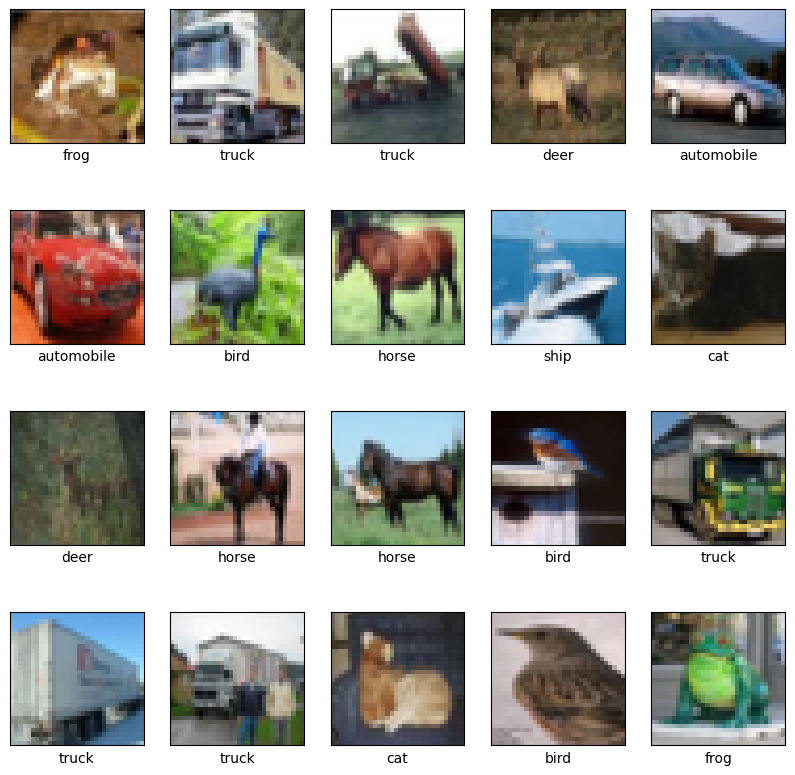

In [77]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
# class_names = ['ship']

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4767 - accuracy: 0.4622 - val_loss: 1.2147 - val_accuracy: 0.5689
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1162 - accuracy: 0.6056 - val_loss: 1.0750 - val_accuracy: 0.6182
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9628 - accuracy: 0.6613 - val_loss: 0.9551 - val_accuracy: 0.6616
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8671 - accuracy: 0.6958 - val_loss: 0.8884 - val_accuracy: 0.6863
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8000 - accuracy: 0.7205 - val_loss: 0.9320 - val_accuracy: 0.6732
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7447 - accuracy: 0.7390 - val_loss: 0.8580 - val_accuracy: 0.7036
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6898 - accuracy: 0.7581 - val_loss: 0.9165 -

313/313 - 2s - loss: 0.9673 - accuracy: 0.6948 - 2s/epoch - 7ms/step


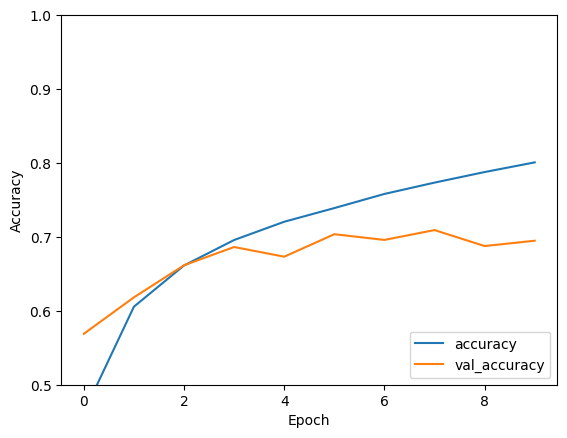

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [78]:
print(test_acc)

0.6948000192642212


In [82]:
print(tf.config.list_physical_devices('GPU'))

[]
